In [1]:
import pandas as pd
import numpy as np

In [2]:
nrows = 375

In [4]:
data = pd.read_csv("engish_headlines_3_nnew.csv", nrows = nrows)

In [5]:
data

,Unnamed: 0,Date,Headline,begins_at,open_price,close_price
0,0,2018-02-25,Original Pizza Day Purchaser Does It Again Wit...,2018-02-25,9680.200,9584.450
1,1,2018-02-25,This 11-year-old just wrote a book on bitcoin ...,2018-02-25,9680.200,9584.450
2,2,2018-02-25,"Without Mentioning Blockchain, Putin Says That...",2018-02-25,9680.200,9584.450
3,3,2018-02-25,Meet the strippers tattooed with BARCODES so s...,2018-02-25,9680.200,9584.450
4,4,2018-02-26,Bitcoin Pizza Day 2: How A Lightning Payment M...,2018-02-26,9592.495,10318.785
...,...,...,...,...,...,...
370,370,2018-04-08,Want to Mine Bitcoin Without a Mining Hardware...,2018-04-08,6900.260,7022.945
371,371,2018-04-08,"Islam and cryptocurrency, halal or not halal?",2018-04-08,6900.260,7022.945
372,372,2018-04-09,Lightning Labs Chief: We're Entering a 'Bitcoi...,2018-04-09,7022.945,6770.410
373,373,2018-04-09,Bitcoin's Value to Lose $44 Billion by Year's ...,2018-04-09,7022.945,6770.410


In [6]:
data_array = np.array(data)
data_list = list(data_array[:,3])

In [7]:
data_list[:10]

['2018-02-25',
 '2018-02-25',
 '2018-02-25',
 '2018-02-25',
 '2018-02-26',
 '2018-02-26',
 '2018-02-26',
 '2018-02-26',
 '2018-02-26',
 '2018-02-26']

In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [9]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [10]:
inputs = tokenizer(data_list, padding = True, truncation = True, return_tensors='pt')

In [11]:
outputs = model(**inputs)

In [12]:
outputs[:10]

(tensor([[-1.1492, -0.5371,  2.3539],
         [-1.1492, -0.5371,  2.3539],
         [-1.1492, -0.5371,  2.3539],
         ...,
         [-1.1597, -0.5629,  2.4074],
         [-1.1597, -0.5629,  2.4074],
         [-1.1597, -0.5629,  2.4074]], grad_fn=<AddmmBackward0>),)

In [13]:
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

In [14]:
model.config.id2label

#Tweet #Positive #Negative #Neutral
positive = predictions[:, 0].tolist()
negative = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()

sentiment = [{positive[index]:"Positive", negative[index]:"Negative", neutral[index]:"Neutral"}[max(positive[index], negative[index], neutral[index])] for index in range(nrows)]

table = {'Headline':data_list,
         "Positive":positive,
         "Negative":negative,
         "Neutral":neutral}

data2 = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral"])

In [15]:
data2

,Headline,Positive,Negative,Neutral
0,2018-02-25,0.027729,0.051142,0.921129
1,2018-02-25,0.027729,0.051142,0.921129
2,2018-02-25,0.027729,0.051142,0.921129
3,2018-02-25,0.027729,0.051142,0.921129
4,2018-02-26,0.026313,0.060426,0.913261
...,...,...,...,...
370,2018-04-08,0.024645,0.044107,0.931248
371,2018-04-08,0.024645,0.044107,0.931248
372,2018-04-09,0.026158,0.047509,0.926333
373,2018-04-09,0.026158,0.047509,0.926333


In [ ]:
data2.to_csv("FinBERT_classes_evaluations_375.csv")

In [ ]:
sentiment[:10]

In [ ]:
table2 = {'Headline':data_list,
         "Positive":positive,
         "Negative":negative,
         "Neutral":neutral,
        "Sentiment":sentiment}

data3 = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral", "Sentiment"])
for index in data3.index:
    data3["Sentiment"].loc[index] = sentiment[index]

In [ ]:
data3

In [ ]:
data3.to_csv("FinBERT_results_375.csv")

In [ ]:
table3 = {'Headline':data_list,
        "Sentiment":sentiment}

data4 = pd.DataFrame(table, columns = ["Headline", "Sentiment"])
for index in data4.index:
    data4["Sentiment"].loc[index] = sentiment[index]

In [ ]:
data4

In [ ]:
data4.to_csv("FinBERT_sentiments_375.csv")

In [ ]:
import matplotlib.pyplot as plt

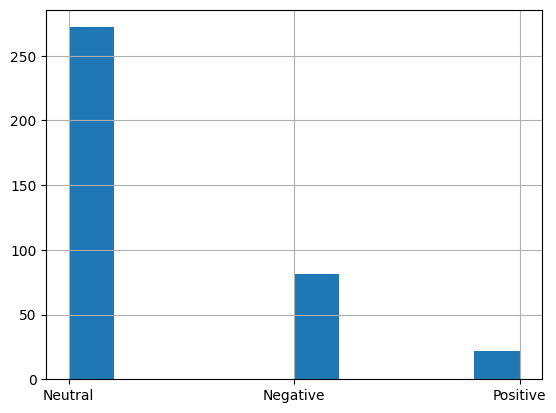

In [ ]:
data4["Sentiment"].hist()
plt.show()

In [41]:
from time import sleep
data_new = pd.read_csv("engish_headlines_3_nnew.csv").iloc[16156:]
data_new.drop(["Unnamed: 0"], inplace = True, axis = 1)
nrows = 1

In [42]:
data_new

,Date,Headline,begins_at,open_price,close_price
16156,2023-02-24,Bitcoin Price Prediction As BTC Consolidates a...,2023-02-24,23945.403897,23185.716258


In [43]:
for index in range(0, int(len(data_new)/nrows)+1):
  data_chunk = data_new[index*nrows:(index+1)*nrows]

  data_array_chunk = np.array(data_chunk)
  data_list_chunk = list(data_array_chunk[:,1])

  inputs_chunk = tokenizer(data_list_chunk, padding = True, truncation = True, return_tensors='pt')

  outputs_chunk = model(**inputs_chunk)

  predictions_chunk = torch.nn.functional.softmax(outputs_chunk.logits, dim=-1)

  positive_chunk = predictions_chunk[:, 0].tolist()
  negative_chunk = predictions_chunk[:, 1].tolist()
  neutral_chunk = predictions_chunk[:, 2].tolist()

  sentiment_chunk = [{positive_chunk[index]:"Positive", negative_chunk[index]:"Negative", neutral_chunk[index]:"Neutral"}[max(positive_chunk[index], negative_chunk[index], neutral_chunk[index])] for index in range(nrows)]

  # print(len(sentiment_chunk))
  # print(len(negative_chunk))
  table_chunk = {'Headline':data_list_chunk,
          "Positive":positive_chunk,
          "Negative":negative_chunk,
          "Neutral":neutral_chunk,
          "Sentiment":sentiment_chunk}

  data2_chunk = pd.DataFrame(table_chunk, columns = ["Headline", "Positive", "Negative", "Neutral", "Sentiment"])
  data2_chunk.to_csv(f"chunks/FinBERT_chunk_{index}.csv")

In [44]:
import shutil
shutil.make_archive("chunks", "zip", "./chunks")

'/content/chunks.zip'

In [ ]:
import os
os.listdir()

['.config',
 'chunks.zip',
 'headlines.csv',
 '.ipynb_checkpoints',
 'chunks',
 'sample_data']